# Plots using Machine Learning 

In [30]:
import numpy as np
import pandas as pd
import mpld3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Preprocessing

In [2]:
# load data
df = pd.read_csv('panic_attack_dataset.csv')

# drop non-binary gender and encode Gender
df = df[df["Gender"] != "Non-binary"].copy()
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})

# binary encode yes/no columns
yes_no = ["Sweating", "Shortness_of_Breath", "Dizziness", "Trembling",
        "Smoking", "Therapy", "Medication", "Chest_Pain"]

# map to df
df[yes_no] = df[yes_no].map(lambda x: 1 if x == "Yes" else 0 if x == "No" else np.nan)

# Convert Panic_Score (numeric) into severity categories
def panic_severity(score):
    if score <= 3:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

df["Panic_Severity"] = df["Panic_Score"].apply(panic_severity)

# Encode severity into ordinal labels
severity_map = {"Low": 0, "Medium": 1, "High": 2}
df["Panic_Severity_Label"] = df["Panic_Severity"].map(severity_map)

# Drop unused or identifier columns
df = df.drop(columns=["ID"])

# --- Numerical features ---
numerical = ["Heart_Rate", "Caffeine_Intake", "Exercise_Frequency", "Sleep_Hours", "Alcohol_Consumption"]

# --- Standardize numerical features ---
X = df[numerical]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=numerical)

# Ready-to-use target
y = df["Panic_Severity_Label"].values

# Feature Importance for Predicting Panic Severity

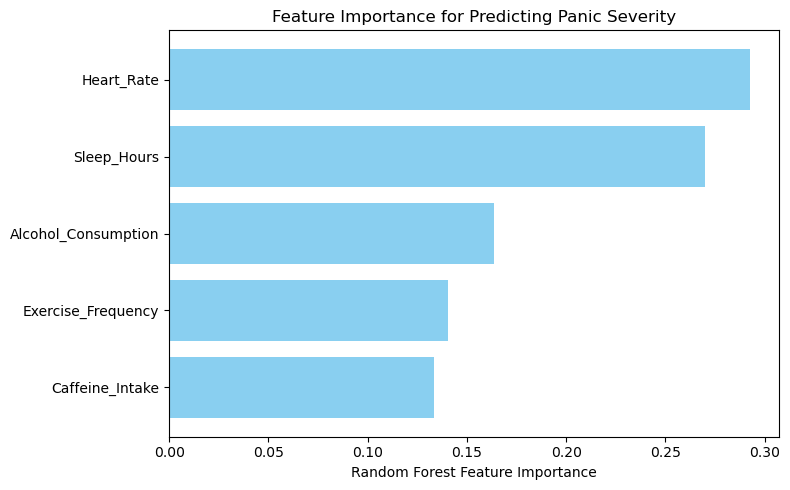

In [37]:
# Encode Panic_Severity as numeric
le = LabelEncoder()
df["Panic_Severity_Encoded"] = le.fit_transform(df["Panic_Severity"])

features = ["Caffeine_Intake", "Exercise_Frequency", "Sleep_Hours", "Heart_Rate", "Alcohol_Consumption"]
X = df[features]
y = df["Panic_Severity_Encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(range(len(indices)), importances[indices], align='center', color='#89cff0')
ax.set_yticks(range(len(indices)))
ax.set_yticklabels([features[i] for i in indices])
ax.set_xlabel("Random Forest Feature Importance")
ax.set_title("Feature Importance for Predicting Panic Severity")
plt.tight_layout()

# Save to HTML
html_str = mpld3.fig_to_html(fig)
with open("feature_importance.html", "w") as f:
    f.write(html_str)

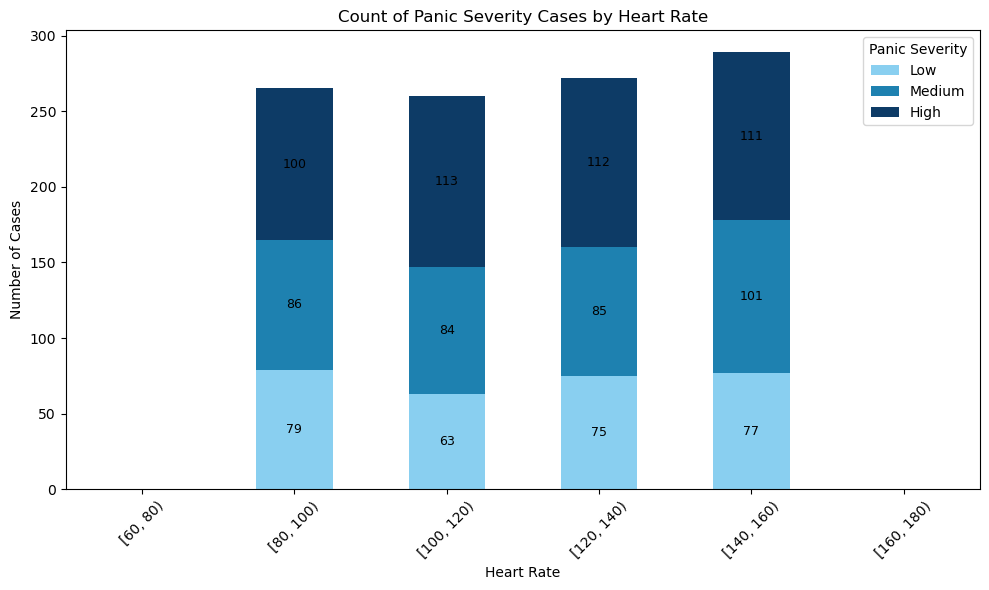

In [39]:
fig2, ax = plt.subplots(figsize=(10, 6))
count_df.plot(kind="bar", stacked=True, ax=ax, color=["#89cff0", "#1E81B0", "#0d3b66"])

for i, (idx, row) in enumerate(count_df.iterrows()):
    cumulative = 0
    for severity in ["Low", "Medium", "High"]:
        value = row[severity]
        if value > 0:
            ax.text(i, cumulative + value / 2, str(int(value)), ha='center', va='center', fontsize=9, color='black')
            cumulative += value

ax.set_title("Count of Panic Severity Cases by Heart Rate")
ax.set_xlabel("Heart Rate")
ax.set_ylabel("Number of Cases")
ax.legend(title="Panic Severity")
plt.xticks(rotation=45)
plt.tight_layout()

# Save as HTML
html_str = mpld3.fig_to_html(fig2)
with open("stacked_bar_panic_severity.html", "w") as f:
    f.write(html_str)